# Pointer

*BILD VON ANWENDUNG*

Introduction Text

# Data

## Data Import

In [17]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Poiinter/230107_monitor_test_v2.csv")
df.head()

,x,y,score,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,1105.859064,902.486198,0.451373,352.817736,10.706440,361.155214,-0.867421,338.362417,-3.862374,363.852043,...,239.639373,311.811218,315.307150,474.575357,245.151048,473.218632,313.741026,490.186272,240.730724,462.453718
1,1114.179371,903.566594,0.452052,334.439200,9.100654,340.948491,-2.281431,323.264271,-6.734236,337.753007,...,235.152881,284.249351,308.030179,467.455814,247.416809,470.840498,316.806270,370.010458,240.839809,442.305900
2,1122.499678,904.646989,0.466033,329.021033,9.944691,334.892110,-1.730865,318.332058,-1.942716,331.237676,...,233.793769,286.959570,306.943199,466.774779,245.918359,472.001487,329.473355,365.256883,241.555533,442.790276
3,1130.819985,905.727385,0.526720,321.961700,6.450321,328.159601,-6.482006,308.747409,-8.110413,328.365997,...,232.812377,285.465646,305.857372,464.830862,248.157576,471.557375,328.665038,363.826287,241.060193,443.713413
4,1139.140292,906.807780,0.518658,325.858099,7.217731,329.940585,-5.394219,312.680823,-7.080344,323.136519,...,233.058927,285.559262,305.324271,463.775695,249.212813,470.028039,335.905685,356.820015,241.546078,444.940322


## Data Cleaning


### Filter for relevant Data (Upper Body)

In [18]:
df = df.iloc[:, 0:25]
df

,x,y,score,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,...,right_shoulder_x,right_shoulder_y,left_elbow_x,left_elbow_y,right_elbow_x,right_elbow_y,left_wrist_x,left_wrist_y,right_wrist_x,right_wrist_y
0,1105.859064,902.486198,0.451373,352.817736,10.706440,361.155214,-0.867421,338.362417,-3.862374,363.852043,...,220.137439,47.594354,381.564322,199.277873,236.701646,142.069287,380.826349,332.618294,376.824694,163.388171
1,1114.179371,903.566594,0.452052,334.439200,9.100654,340.948491,-2.281431,323.264271,-6.734236,337.753007,...,210.524930,38.842952,377.478000,185.557725,223.641304,148.980864,377.466898,324.520153,365.997031,146.082615
2,1122.499678,904.646989,0.466033,329.021033,9.944691,334.892110,-1.730865,318.332058,-1.942716,331.237676,...,208.378107,34.859819,375.959733,188.866970,237.731030,157.030661,377.969872,319.990905,364.152118,140.095559
3,1130.819985,905.727385,0.526720,321.961700,6.450321,328.159601,-6.482006,308.747409,-8.110413,328.365997,...,207.550010,31.353186,373.610520,193.787702,225.593431,137.880219,377.649244,318.013783,361.651285,136.886505
4,1139.140292,906.807780,0.518658,325.858099,7.217731,329.940585,-5.394219,312.680823,-7.080344,323.136519,...,204.929039,33.865798,372.543471,193.598143,225.632633,133.530095,376.628285,314.743647,360.433224,135.945699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,852.140438,546.550081,0.435338,526.815242,38.447614,533.464548,10.346023,491.644762,9.892237,501.317687,...,355.206190,142.761715,370.839458,256.866504,312.694066,358.675656,364.492275,331.096062,379.766161,450.891229
3481,860.643944,555.771951,0.491279,535.719658,40.769090,542.048918,11.858970,503.534629,11.445168,494.421505,...,335.702545,141.752730,373.345895,255.598565,311.466906,372.935430,366.848447,312.883730,378.417100,447.528399
3482,869.147450,564.993821,0.464046,536.190326,37.974410,540.423217,10.290979,506.000512,10.920054,493.838868,...,344.677950,140.390754,382.470001,255.434027,311.943408,375.652115,373.071485,315.179796,354.278304,438.509005
3483,877.650956,574.215691,0.473702,535.476127,37.956866,540.403713,9.935989,506.162110,9.515226,493.221037,...,345.292634,136.059266,374.424681,276.024815,308.548197,373.856465,365.516308,331.919149,366.637977,447.481969



Score



Empty fields

## Data Analysis

Find Correlations



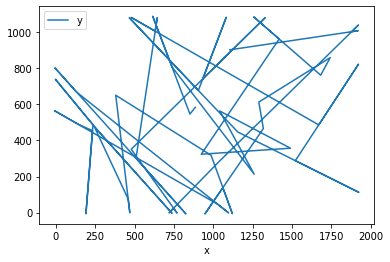

In [19]:
import matplotlib.pyplot as plt

# Set the x and y data
x = df['x']
y = df['y']

# Create the plot
df.plot(x='x', y='y', kind='line')

# Show the plot
plt.show()

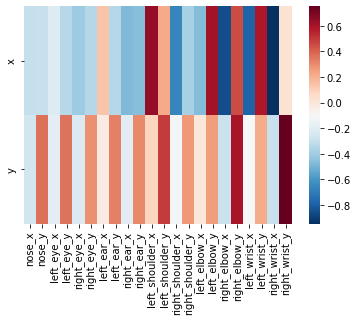

In [20]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr.iloc[:2, 3:], cmap='RdBu_r')


Heatmap of Datapoints

In [21]:
df.iloc[:, 3:]

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_shoulder_x,right_shoulder_y,left_elbow_x,left_elbow_y,right_elbow_x,right_elbow_y,left_wrist_x,left_wrist_y,right_wrist_x,right_wrist_y
0,352.817736,10.706440,361.155214,-0.867421,338.362417,-3.862374,363.852043,1.700997,291.427464,-3.686531,...,220.137439,47.594354,381.564322,199.277873,236.701646,142.069287,380.826349,332.618294,376.824694,163.388171
1,334.439200,9.100654,340.948491,-2.281431,323.264271,-6.734236,337.753007,0.047006,280.433740,-8.097423,...,210.524930,38.842952,377.478000,185.557725,223.641304,148.980864,377.466898,324.520153,365.997031,146.082615
2,329.021033,9.944691,334.892110,-1.730865,318.332058,-1.942716,331.237676,0.374065,275.876775,-7.522892,...,208.378107,34.859819,375.959733,188.866970,237.731030,157.030661,377.969872,319.990905,364.152118,140.095559
3,321.961700,6.450321,328.159601,-6.482006,308.747409,-8.110413,328.365997,-1.972207,268.913068,-8.494932,...,207.550010,31.353186,373.610520,193.787702,225.593431,137.880219,377.649244,318.013783,361.651285,136.886505
4,325.858099,7.217731,329.940585,-5.394219,312.680823,-7.080344,323.136519,-1.950561,266.614039,-7.332540,...,204.929039,33.865798,372.543471,193.598143,225.632633,133.530095,376.628285,314.743647,360.433224,135.945699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,526.815242,38.447614,533.464548,10.346023,491.644762,9.892237,501.317687,13.068797,405.730884,9.657907,...,355.206190,142.761715,370.839458,256.866504,312.694066,358.675656,364.492275,331.096062,379.766161,450.891229
3481,535.719658,40.769090,542.048918,11.858970,503.534629,11.445168,494.421505,12.728940,407.202403,11.574555,...,335.702545,141.752730,373.345895,255.598565,311.466906,372.935430,366.848447,312.883730,378.417100,447.528399
3482,536.190326,37.974410,540.423217,10.290979,506.000512,10.920054,493.838868,12.530506,411.081981,11.120255,...,344.677950,140.390754,382.470001,255.434027,311.943408,375.652115,373.071485,315.179796,354.278304,438.509005
3483,535.476127,37.956866,540.403713,9.935989,506.162110,9.515226,493.221037,10.198863,411.495375,6.603251,...,345.292634,136.059266,374.424681,276.024815,308.548197,373.856465,365.516308,331.919149,366.637977,447.481969


## Prepare Data

Split the data into training and test sets

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df.iloc[:, 3:]
y = df.iloc[:, :2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model

## Build Model

Define the model

In [23]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.metrics import RootMeanSquaredError

model = Sequential()
model.add(Dense(32, input_dim=22, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2))

## Compile the model

In [24]:
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])


### Train the model

In [25]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/2000
77/77 [==============================] - 1s 5ms/step - loss: 290474.9375 - accuracy: 0.7282 - val_loss: 146762.2969 - val_accuracy: 0.7696
Epoch 2/2000
77/77 [==============================] - 0s 4ms/step - loss: 116084.0703 - accuracy: 0.7487 - val_loss: 97964.1484 - val_accuracy: 0.7696
Epoch 3/2000
77/77 [==============================] - 0s 4ms/step - loss: 87615.6797 - accuracy: 0.7589 - val_loss: 83484.8203 - val_accuracy: 0.8509
Epoch 4/2000
77/77 [==============================] - 0s 4ms/step - loss: 77344.4141 - accuracy: 0.8167 - val_loss: 74676.8281 - val_accuracy: 0.8547
Epoch 5/2000
77/77 [==============================] - 0s 4ms/step - loss: 71168.9531 - accuracy: 0.8372 - val_loss: 81553.4219 - val_accuracy: 0.8442
Epoch 6/2000
77/77 [==============================] - 0s 6ms/step - loss: 64690.8594 - accuracy: 0.8434 - val_loss: 60346.2969 - val_accuracy: 0.8681
Epoch 7/2000
77/77 [==============================] - 0s 5ms/step - loss: 57185.0742 - accuracy: 

## Evaluate Model

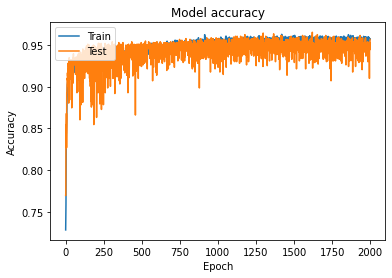

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

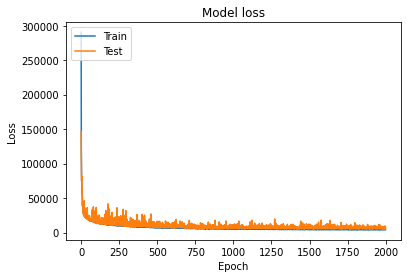

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Vergleich durch zwei Visualisierungen der Pfade

## Export Model

In [28]:
import tensorflow as tf
from datetime import datetime

# Get the current date and time
now = datetime.now()
date_time_string = now.strftime('%Y%m%d-%H%M')
print(date_time_string)  # "20230107-1545"

# Save the model as a SavedModel
save_dir = '/content/drive/MyDrive/Poiinter/export/' + date_time_string + '_model'
tf.saved_model.save(model, save_dir)
save_dir = '/content/drive/MyDrive/Poiinter/export/' + date_time_string + '_model.h5'
model.save(save_dir)

20230107-2204


## Results